In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/Walmart.csv", parse_dates=['Date'])


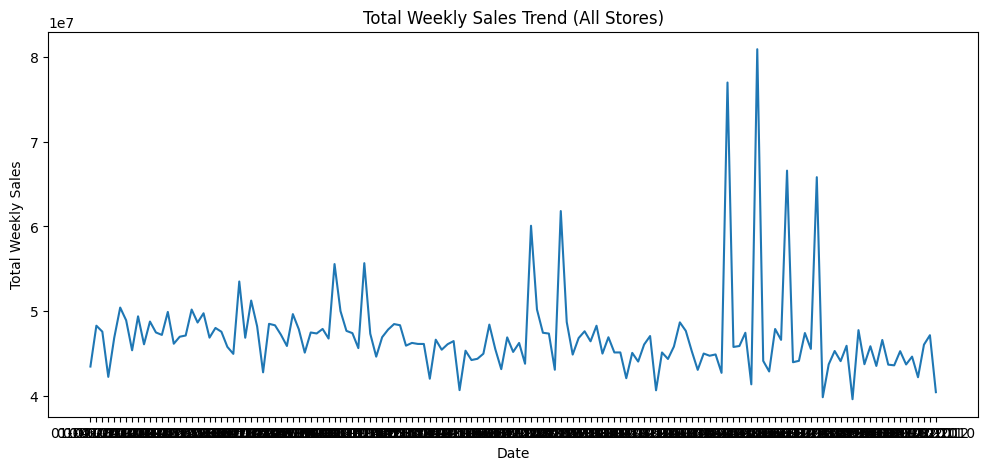

In [ ]:
# weekly sales change over time
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(weekly_trend['Date'], weekly_trend['Weekly_Sales'])
plt.title("Total Weekly Sales Trend (All Stores)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()


Initial raw visualization appeared cluttered due to overlapping store-level sales. Aggregating sales at the company level revealed clear seasonal patterns and demand spikes.


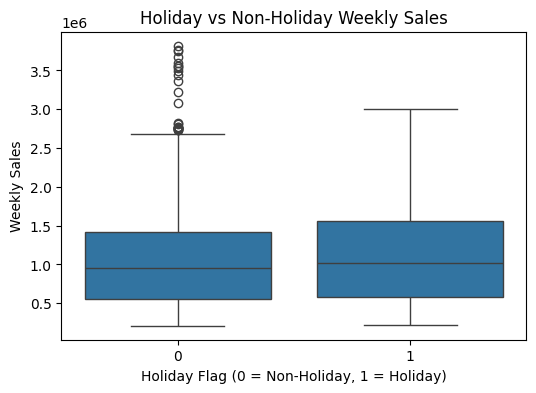

In [6]:
# Holiday vs Non-Holiday Sales
plt.figure(figsize=(6,4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Weekly Sales")
plt.xlabel("Holiday Flag (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Weekly Sales")
plt.show()



Holiday weeks show higher variability and occasional sales spikes compared to non-holiday periods, indicating increased consumer spending during festive seasons.

In [8]:
# Store-wise Performance Analysis
# Which stores perform best and which underperform
store_performance = (
    df.groupby('Store')['Weekly_Sales']
    .mean()
    .sort_values(ascending=False)
)

store_performance.head(10)


Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
Name: Weekly_Sales, dtype: float64

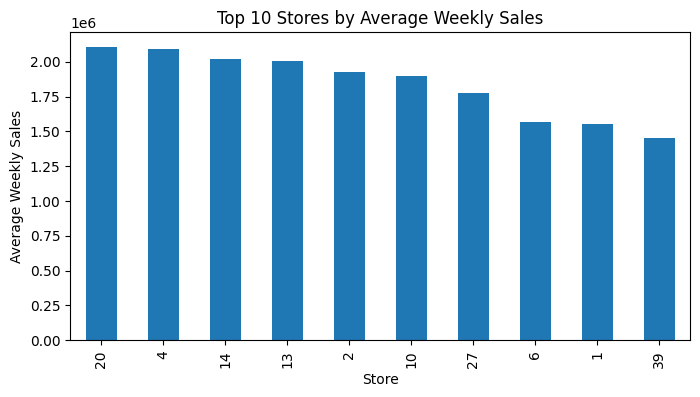

In [9]:
# Visualize Top 10 Stores
plt.figure(figsize=(8,4))
store_performance.head(10).plot(kind='bar')
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()

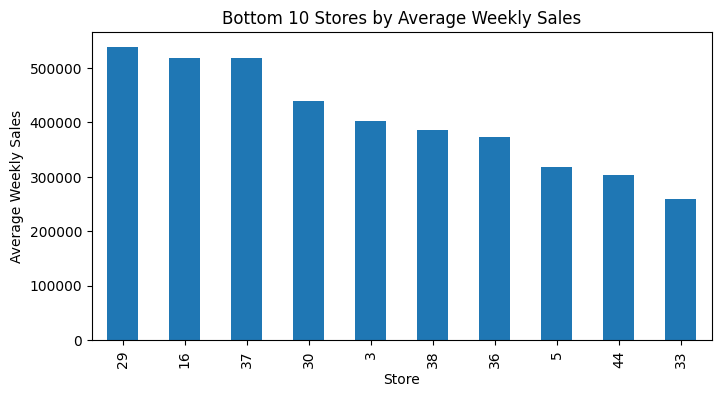

In [10]:
#  Bottom 10 Stores (Very insightful) 
store_performance.tail(10)


# (plot) 

plt.figure(figsize=(8,4))
store_performance.tail(10).plot(kind='bar')
plt.title("Bottom 10 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()

Significant variation exists in average weekly sales across stores. High-performing stores consistently outperform others, suggesting opportunities to replicate successful strategies, while low-performing stores may require operational or marketing interventions.

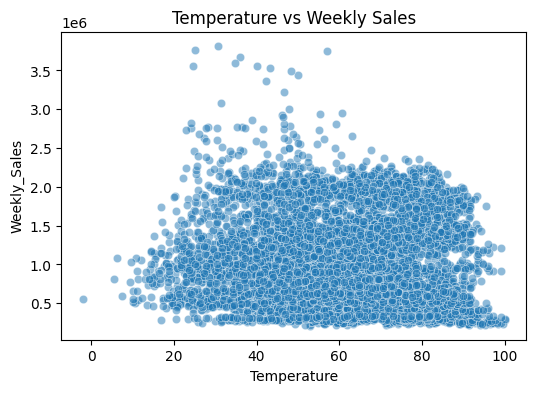

In [ ]:
# External Factors vs Weekly Sales
# Do external conditions like temperature, fuel price, inflation, and unemployment influence sales?


# Temperature vs Weekly Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Temperature vs Weekly Sales")
plt.show()


The scatter plot shows a wide dispersion of weekly sales across all temperature ranges, indicating no strong linear relationship between temperature and sales.

C:\Users\ABHILIPSA PATI\AppData\Local\Temp\ipykernel_6920\3493575618.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales = df.groupby('Temp_Bin')['Weekly_Sales'].mean()


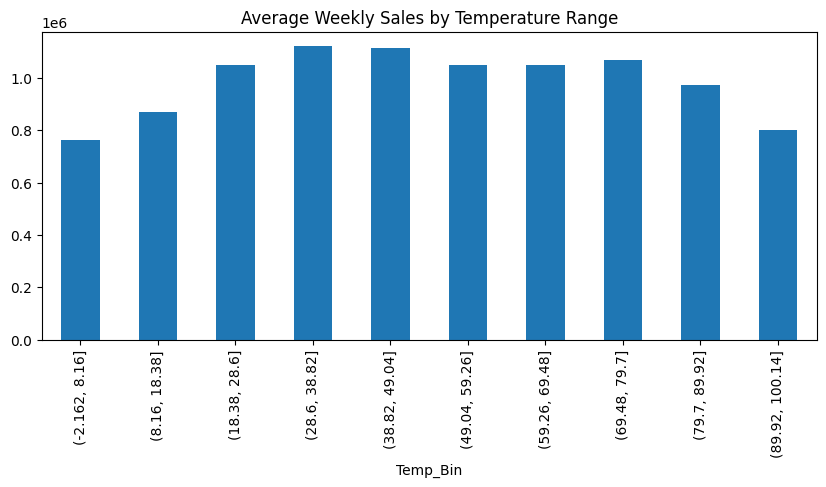

In [13]:
df['Temp_Bin'] = pd.cut(df['Temperature'], bins=10)

temp_sales = df.groupby('Temp_Bin')['Weekly_Sales'].mean()

temp_sales.plot(kind='bar', figsize=(10,4))
plt.title("Average Weekly Sales by Temperature Range")
plt.show()

While the raw scatter plot shows high variability in weekly sales across temperature values, binned analysis confirms that average sales remain relatively stable across temperature ranges. This suggests temperature has minimal direct impact on Walmart’s weekly sales.

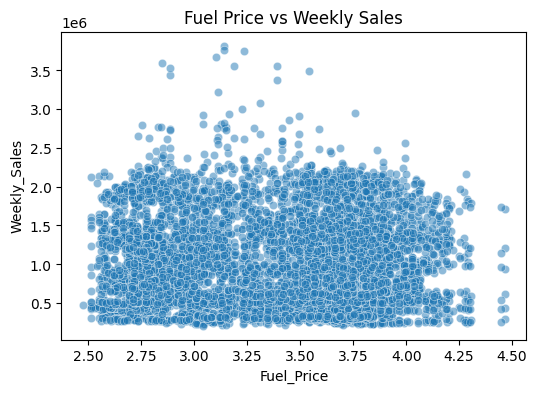

In [15]:
# Fuel Price vs Weekly Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.show()

C:\Users\ABHILIPSA PATI\AppData\Local\Temp\ipykernel_6920\2355306767.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_sales = df.groupby('Fuel_Bin')['Weekly_Sales'].mean()


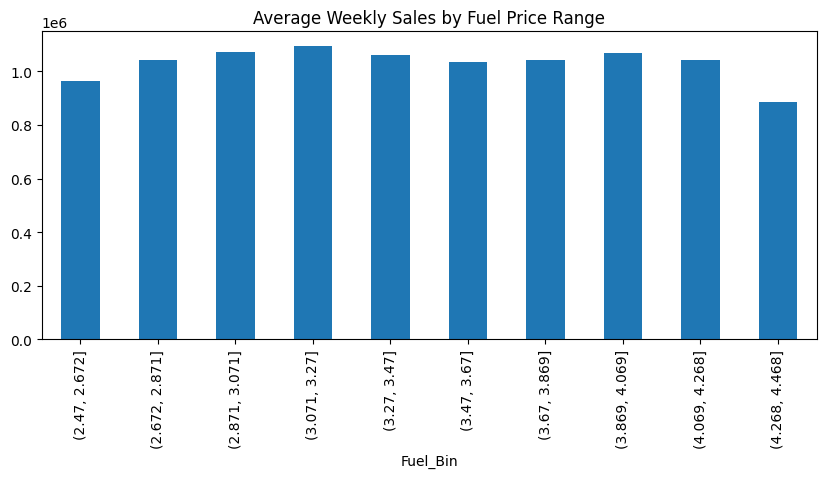

In [20]:
# Fuel Price vs Weekly Sales - Binned
df['Fuel_Bin'] = pd.cut(df['Fuel_Price'], bins=10)
fuel_sales = df.groupby('Fuel_Bin')['Weekly_Sales'].mean()

fuel_sales.plot(kind='bar', figsize=(10,4))
plt.title("Average Weekly Sales by Fuel Price Range")
plt.show()


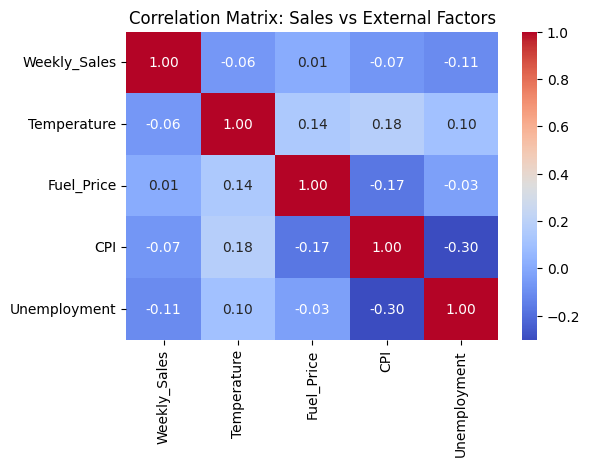

In [21]:
corr_cols = [
    'Weekly_Sales',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment'
]

corr = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Sales vs External Factors")
plt.show()


Exploratory Analysis:

An initial scatter plot was used to examine the relationship between temperature and weekly sales. The visualization shows high dispersion, indicating no strong direct relationship.

Correlation Analysis:

A correlation heatmap was used to quantify the relationships between weekly sales and external factors. Results indicate weak linear correlations, suggesting Walmart sales are resilient to short-term environmental and economic fluctuations.